In [1]:
# Import library and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
df_train_r = pd.read_csv('train.csv')
df_train_add_r = pd.read_csv('train_add.csv')
df_condition_r = pd.read_csv('condition.csv')
df_condition_add_r = pd.read_csv('condition_add.csv')

In [2]:
# Concatnate train and condition data
df_train = pd.concat([df_train_r, df_train_add_r], axis=0)
df_condition = pd.concat([df_condition_r, df_condition_add_r], axis=0)

In [3]:
# Combine df_train with df_stadium_r and df_condition_r
df_stadium_r = pd.read_csv('stadium.csv')
df_train = pd.merge(df_train, df_stadium_r, how='left', left_on='stadium', right_on='name')
df_train = df_train.sort_values(by='id', ascending=True).reset_index(drop=True) # sort by 'id' and reset index (drop=False means old index will be kept as a new column)
df_train = df_train.drop(['name'], axis=1)
df_train = pd.merge(df_train, df_condition, how='left', on='id')

In [4]:
df_train.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'address', 'capa', 'home_score', 'away_score',
       'weather', 'temperature', 'humidity', 'referee', 'home_team', 'home_01',
       'home_02', 'home_03', 'home_04', 'home_05', 'home_06', 'home_07',
       'home_08', 'home_09', 'home_10', 'home_11', 'away_team', 'away_01',
       'away_02', 'away_03', 'away_04', 'away_05', 'away_06', 'away_07',
       'away_08', 'away_09', 'away_10', 'away_11'],
      dtype='object')

In [5]:
df_train['time'].head()

0    14:04
1    14:04
2    14:04
3    14:06
4    14:04
Name: time, dtype: object

1. year
convert 2012, 2013, and 2014 into 0, 1, and 2
2. stage
J1, J2 into 0, and 1
3. match
第n節第m日 ino n using .split()
caculate n/max(n)
4. gameday
03/14(土) -> month and weekday or not
5. time
14:05 -> worktime(~17:00) into 0, not into 1
6. capa
divide y by capa -> change problem into expection of filled percentage

Match

In [6]:
# extract match number data from 'match'
X_match = df_train.loc[:, ['match']].values
X_match_num = np.zeros(X_match.size)
for i in range(0,len(X_match),1):
    temp = X_match[i,0].split('節')
    temp_2 = temp[0].split('第')
    X_match_num[i] = int(temp_2[1])

In [7]:
X_match_num.reshape(-1,1)
df_train.loc[:,['match']] = X_match_num
df_train.loc[:5, 'match']

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: match, dtype: float64

Year

In [8]:
# using .map method, convert year into year number
year_num = {2012: 0, 2013: 1, 2014: 2}
df_train['year'] = df_train['year'].map(year_num)

In [9]:
df_train['year'].head()

0    0
1    0
2    0
3    0
4    0
Name: year, dtype: int64

Stage

In [10]:
stage_num = {'Ｊ１': 0, 'Ｊ２': 1}
df_train['stage'] = df_train['stage'].map(stage_num)
np.unique(df_train['stage'])

array([0, 1], dtype=int64)

time

In [11]:
# convert time into workingtime ()
X_time = df_train.loc[:, ['time']].values
X_time_num = np.zeros(X_time.size)
for i in range(0,len(X_time),1):
    temp = X_time[i,0].split(':')
    X_time_num[i] = int(temp[0])

In [12]:
df_train['time'] = X_time_num
df_train['time'].head(10)

0    14.0
1    14.0
2    14.0
3    14.0
4    14.0
5    14.0
6    17.0
7    19.0
8    14.0
9    14.0
Name: time, dtype: float64

date

In [13]:
X_gameday = df_train['gameday'].values
X_gameday_num = np.zeros(X_gameday.size)
for i in range(0,len(X_gameday),1):
    temp = X_gameday[i].split('(')
    temp_2 = temp[1].split(')')
    # print(len(temp_2[0])>2)
    if len(temp_2[0])>2:
        temp_3 = temp_2[0].split('・')
        temp_2[0] = temp_3[1]
    if (temp_2[0] == '土') or (temp_2[0] == '日') or (temp_2[0] == '祝'):
        X_gameday_num[i] = 1
    else: X_gameday_num[i] = 0

In [14]:
df_train['gameday'] = X_gameday_num
np.unique(df_train['gameday'])

array([ 0.,  1.])

In [15]:
df_train.head(10)

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,18250,0,0,1.0,1.0,14.0,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,24316,0,0,1.0,1.0,14.0,名古屋グランパス,清水エスパルス,豊田スタジアム,...,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,17066,0,0,1.0,1.0,14.0,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,29603,0,0,1.0,1.0,14.0,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,25353,0,0,1.0,1.0,14.0,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一
5,13999,11283,0,0,1.0,1.0,14.0,サガン鳥栖,セレッソ大阪,ベストアメニティスタジアム,...,茂庭 照幸,藤本 康太,丸橋 祐介,酒本 憲幸,扇原 貴宏,山口 螢,キム ボギョン,清武 弘嗣,ブランキーニョ,ケンペス
6,14000,18920,0,0,1.0,1.0,17.0,川崎フロンターレ,アルビレックス新潟,等々力陸上競技場,...,三門 雄大,鈴木 大輔,大井 健太郎,金 珍洙,菊地 直哉,本間 勲,小谷野 顕治,アラン ミネイロ,矢野 貴章,ブルーノ ロペス
7,14001,11437,0,0,1.0,1.0,19.0,大宮アルディージャ,ＦＣ東京,ＮＡＣＫ５スタジアム大宮,...,徳永 悠平,森重 真人,加賀 健一,太田 宏介,高橋 秀人,梶山 陽平,羽生 直剛,長谷川 アーリアジャスール,谷澤 達也,ルーカス
8,14002,13082,0,0,1.0,1.0,14.0,柏レイソル,横浜Ｆ・マリノス,日立柏サッカー場,...,小林 祐三,栗原 勇蔵,中澤 佑二,金井 貢史,兵藤 慎剛,小椋 祥平,中村 俊輔,齋藤 学,小野 裕二,大黒 将志
9,14003,19010,0,0,2.0,1.0,14.0,鹿島アントラーズ,川崎フロンターレ,県立カシマサッカースタジアム,...,實藤 友紀,ジェシ,森下 俊,小宮山 尊信,中村 憲剛,柴崎 晃誠,田坂 祐介,山瀬 功治,レナト,小松 塁


In [16]:
df_train.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'address', 'capa', 'home_score', 'away_score',
       'weather', 'temperature', 'humidity', 'referee', 'home_team', 'home_01',
       'home_02', 'home_03', 'home_04', 'home_05', 'home_06', 'home_07',
       'home_08', 'home_09', 'home_10', 'home_11', 'away_team', 'away_01',
       'away_02', 'away_03', 'away_04', 'away_05', 'away_06', 'away_07',
       'away_08', 'away_09', 'away_10', 'away_11'],
      dtype='object')

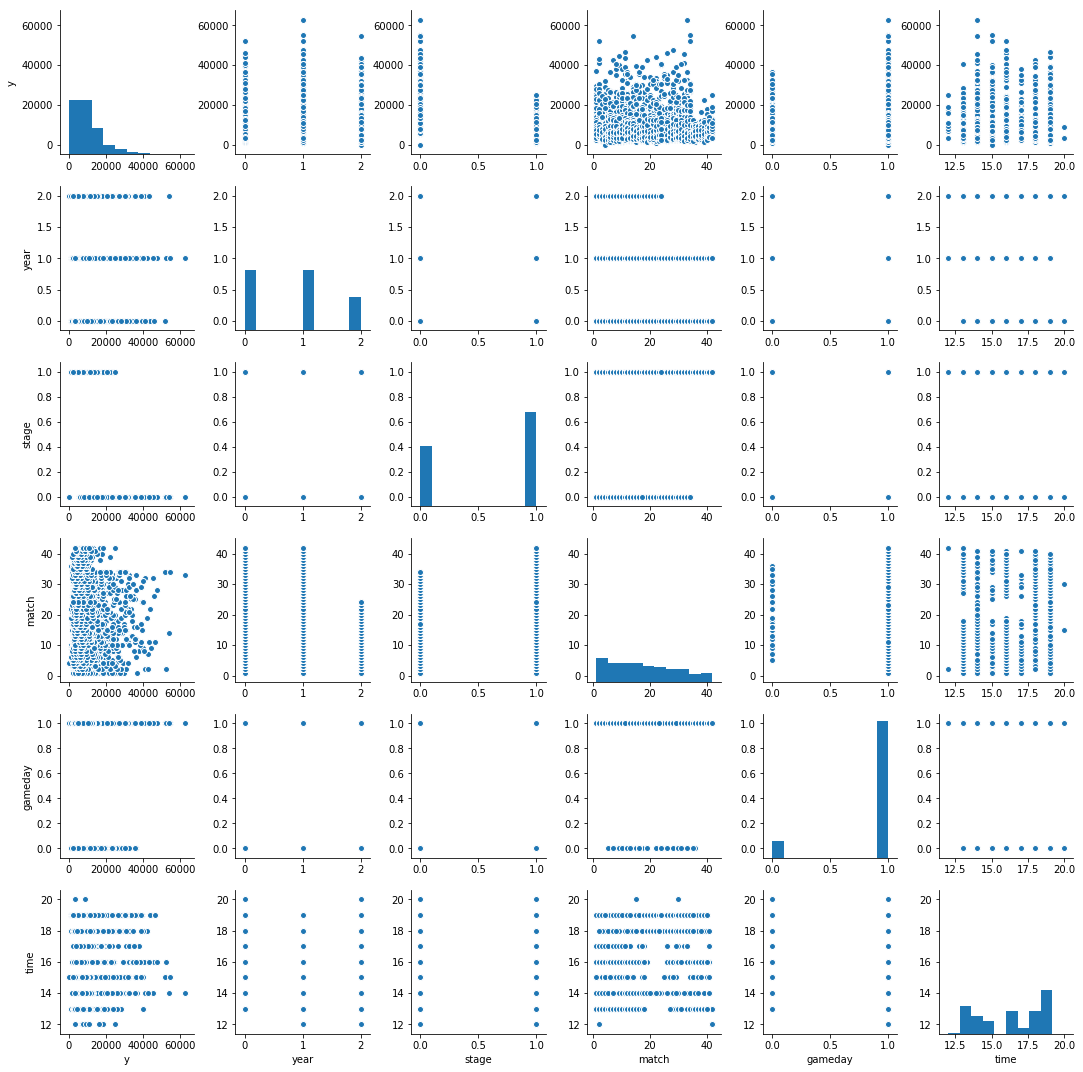

In [17]:
import seaborn as sns
sns.pairplot(df_train.loc[:, ['y', 'year', 'stage', 'match', 'gameday', 'time']])
plt.show()

In [17]:
X_train = df_train.loc[:, ['year', 'stage', 'match', 'gameday', 'time']].values
y_train = df_train['y'].values

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
from sklearn.metrics import mean_squared_error as mse
print('RMSE')
print('train: %.3f' % (mse(y_train, lr.predict(X_train)) ** (1/2)))

RMSE
train: 5952.724


Test data

In [28]:
df_test_r = pd.read_csv('test.csv')

In [42]:
df_test = df_test_r.loc[:,['id', 'year', 'stage', 'match', 'gameday', 'time']]
df_test.columns

# Year
df_test['year'] = df_test['year'].map(year_num)

# Stage
df_test['stage'] = df_test['stage'].map(stage_num)

# Match
X_match_test = df_test.loc[:, ['match']].values
X_match_test_num = np.zeros(X_match_test.size)
%reset_selective temp
for i in range(0,len(X_match_test),1):
    temp = X_match_test[i,0].split('節')
    temp_2 = temp[0].split('第')
    X_match_test_num[i] = int(temp_2[1])
df_test['match'] = X_match_test_num

# Gameday
X_gameday_test = df_test['gameday'].values
X_gameday_test_num = np.zeros(X_gameday_test.size)
%reset_selective temp
for i in range(0,len(X_gameday_test),1):
    temp = X_gameday_test[i].split('(')
    temp_2 = temp[1].split(')')
    if len(temp_2[0])>2:
        temp_3 = temp_2[0].split('・')
        temp_2[0] = temp_3[1]
    if (temp_2[0] == '土') or (temp_2[0] == '日') or (temp_2[0] == '祝'):
        X_gameday_test_num[i] = 1
    else: X_gameday_test_num[i] = 0
df_test['gameday'] = X_gameday_test_num

# Time
X_time_test = df_test['time'].values
X_time_test_num = np.zeros(X_time_test.size)
%reset_selective temp
for i in range(0,len(X_time_test),1):
    temp = X_time_test[i].split(':')
    X_time_test_num[i] = int(temp[0])
df_test['time'] = X_time_test_num

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y
Once deleted, variables cannot be recovered. Proceed (y/[n])?  y
Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [71]:
X_test = df_test.drop('id', axis=1)
id_list = df_test['id']
y_test = lr.predict(X_test)

In [72]:
df_train['y'].mean()

10629.558115719406

In [82]:
id_list.values.reshape(len(id_list),1)
id_list.shape

(313,)

In [110]:
df_output = pd.DataFrame(
    {'id': id_list,
     'est_y': y_test},
    columns=['id', 'est_y']
)

In [109]:
import csv
with open('output_1.csv', 'w', newline='') as f:
    wr = csv.writer(f)
    wr.writerows(df_output.values)
    f.close()
"""
with open('output.csv', 'w', newline='') as f:
    wr = csv.writer(f, lineterminator='\n')
    for i in range(0,len(df_output),1):
        wr.writerow(df_output.loc[i, ['id', 'est_y']])
    f.close()
"""